In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
# Import libraries

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from scipy import stats

import my_functions as func

In [81]:
"""
Main program

"""

# Initiate a dictionary with characteristics and layout information
char_dict = func.make_char_dict()

## Cylindricity of concave cylinders

<AxesSubplot:xlabel='angle', ylabel='error'>

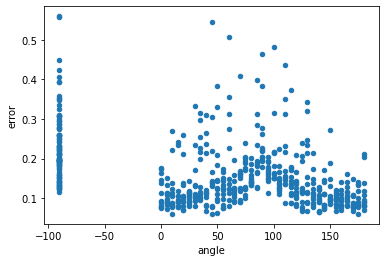

In [82]:
# List of characteristics to plot
chars = ['Cylindricity_Cyl_4mm_Pos',\
         'Cylindricity_Cyl_8mm_Pos',\
         'Cylindricity_Cyl_16mm_Pos',\
         'Cylindricity_Cyl_24mm_Pos']

# Retrieve the characteristics from the dictionary
dfs = func.df_from_dict(chars, char_dict)

dfs = pd.concat(dfs)

dfs.plot.scatter(x='angle', y='error')

<AxesSubplot:xlabel='angle', ylabel='error'>

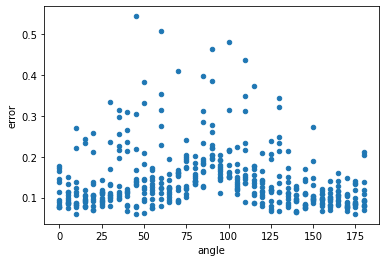

In [83]:
# Remove anchors from dataset
df1 = dfs[dfs['angle'] != -90]

df1.plot.scatter(x='angle', y='error')

<AxesSubplot:xlabel='s_angle', ylabel='error'>

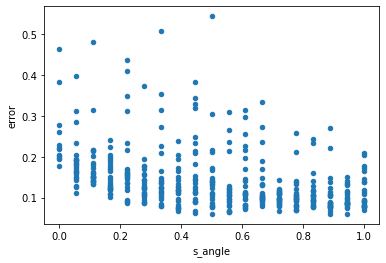

In [84]:
# Construct s_angle where 0 represents horizontal and 1 vertical orientation

df1.insert(7, 's_angle', abs(df1['angle']-90) / 90)

df1.plot.scatter(x='s_angle', y='error')

<AxesSubplot:xlabel='s_angle', ylabel='error'>

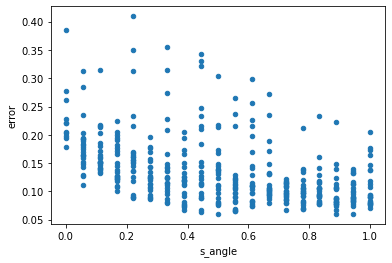

In [99]:
"""
Filter results by quantiles

"""

df_ang = df1

for ang in df_ang['s_angle'].unique():
    q_hi = df_ang[(df_ang['s_angle'] == ang)]['error'].quantile(0.99)
    
    if ang == df_ang['s_angle'].unique()[0]:
        df_filtered = df_ang[(df_ang['s_angle'] == ang) & (df_ang['error'] < q_hi)]
    else:
        df_filtered = pd.concat([df_filtered, df_ang[(df_ang['s_angle'] == ang) & (df_ang['error'] < q_hi)]])
    
df_filtered.plot.scatter(x='s_angle', y='error')

<AxesSubplot:xlabel='s_angle', ylabel='error'>

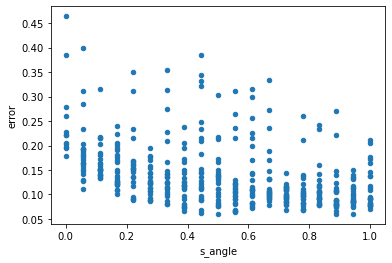

In [112]:
"""
Filtering results by standard deviations

"""

# Copy dataframe
df_new = df1

std = df_new['error'].std()


for ang in df_new['s_angle'].unique():
    hi_lim = df_new[(df_new['s_angle'] == ang)]['error'].mean() + (3*std)    
    
    if ang == df_new['s_angle'].unique()[0]:
        df_filtered = df_new[(df_new['s_angle'] == ang) & (df_new['error'] < hi_lim)]
    else:
        df_filtered = pd.concat([df_filtered, df_new[(df_new['s_angle'] == ang) & (df_new['error'] < hi_lim)]])
    
df_filtered.plot.scatter(x='s_angle', y='error')

## Cylindricity of convex cylinders

<AxesSubplot:xlabel='angle', ylabel='error'>

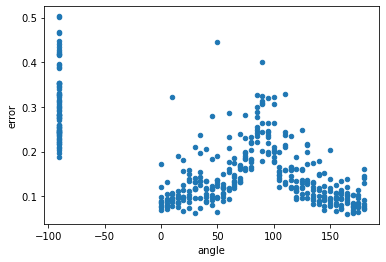

In [113]:
# List of characteristics to plot
chars = ['Cylindricity_Cyl_8mm_Neg',\
         'Cylindricity_Cyl_16mm-Neg',\
         'Cylindricity_Cyl_24mm_Neg']

# Retrieve the characteristics from the dictionary
dfs = func.df_from_dict(chars, char_dict)

dfs = pd.concat(dfs)

dfs.plot.scatter(x='angle', y='error')

<AxesSubplot:xlabel='angle', ylabel='error'>

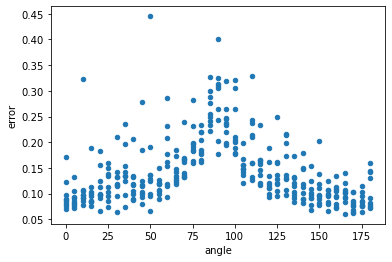

In [114]:
# Remove anchors from dataset
df1 = dfs[dfs['angle'] != -90]

df1.plot.scatter(x='angle', y='error')

<AxesSubplot:xlabel='s_angle', ylabel='error'>

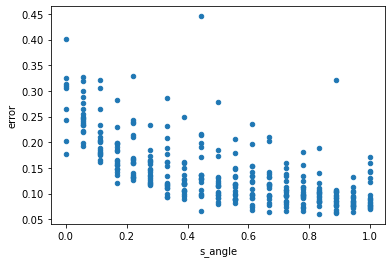

In [115]:
# Construct s_angle where 0 represents horizontal and 1 vertical orientation

df1.insert(7, 's_angle', abs(df1['angle']-90) / 90)

df1.plot.scatter(x='s_angle', y='error')

<AxesSubplot:xlabel='s_angle', ylabel='error'>

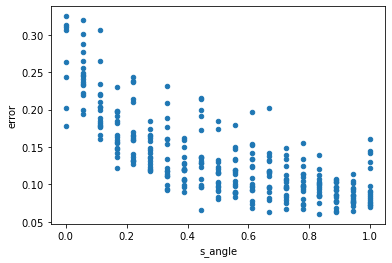

In [116]:
"""
Filter results by quantiles

"""

df_ang = df1

for ang in df_ang['s_angle'].unique():
    q_hi = df_ang[(df_ang['s_angle'] == ang)]['error'].quantile(0.99)
    
    if ang == df_ang['s_angle'].unique()[0]:
        df_filtered = df_ang[(df_ang['s_angle'] == ang) & (df_ang['error'] < q_hi)]
    else:
        df_filtered = pd.concat([df_filtered, df_ang[(df_ang['s_angle'] == ang) & (df_ang['error'] < q_hi)]])
    
df_filtered.plot.scatter(x='s_angle', y='error')

<AxesSubplot:xlabel='s_angle', ylabel='error'>

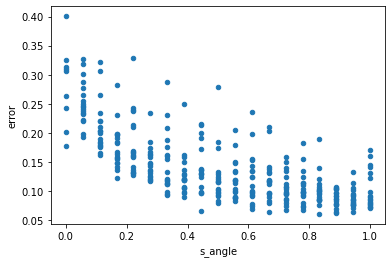

In [118]:
"""
Filtering results by standard deviations

"""

# Copy dataframe
df_new = df1

std = df_new['error'].std()


for ang in df_new['s_angle'].unique():
    hi_lim = df_new[(df_new['s_angle'] == ang)]['error'].mean() + (3*std)
    lo_lim = df_new[(df_new['s_angle'] == ang)]['error'].mean() - (3*std)
    
    if ang == df_new['s_angle'].unique()[0]:
        df_filtered = df_new[(df_new['s_angle'] == ang) & (df_new['error'] < hi_lim) & (df_new['error'] > lo_lim)]
    else:
        df_filtered = pd.concat([df_filtered, df_new[(df_new['s_angle'] == ang) & (df_new['error'] < hi_lim) & (df_new['error'] > lo_lim)]])
    
df_filtered.plot.scatter(x='s_angle', y='error')